<a href="https://colab.research.google.com/github/Wazir123456/The-Developer-Arena-Internship-Tasks-5/blob/main/Developer_Arena_Task_5_%26_screenshot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Loading & Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
sales = pd.read_csv("sales_data.csv")
churn = pd.read_csv("customer_churn.csv")

# Preview data
print("Sales Data")
display(sales.head())

print("Churn Data")
display(churn.head())

# Dataset info
print(sales.info())
print(churn.info())

# Missing values
print("Missing Values - Sales")
print(sales.isnull().sum())

print("Missing Values - Churn")
print(churn.isnull().sum())


Sales Data


,Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales
0,2024-01-01,Phone,7,37300,CUST001,East,261100
1,2024-01-02,Headphones,4,15406,CUST002,North,61624
2,2024-01-03,Phone,2,21746,CUST003,West,43492
3,2024-01-04,Headphones,1,30895,CUST004,East,30895
4,2024-01-05,Laptop,8,39835,CUST005,North,318680


Churn Data


,CustomerID,Tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,PaperlessBilling,SeniorCitizen,Churn
0,C00001,6,64,1540,One year,Credit Card,No,1,0
1,C00002,21,113,1753,Month-to-month,Electronic Check,Yes,1,0
2,C00003,27,31,1455,Two year,Credit Card,No,1,0
3,C00004,53,29,7150,Month-to-month,Electronic Check,No,1,0
4,C00005,16,185,1023,One year,Electronic Check,No,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         100 non-null    object
 1   Product      100 non-null    object
 2   Quantity     100 non-null    int64 
 3   Price        100 non-null    int64 
 4   Customer_ID  100 non-null    object
 5   Region       100 non-null    object
 6   Total_Sales  100 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 5.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CustomerID        500 non-null    object
 1   Tenure            500 non-null    int64 
 2   MonthlyCharges    500 non-null    int64 
 3   TotalCharges      500 non-null    int64 
 4   Contract          500 non-null    object
 5   PaymentMethod     500 non-null    object
 

Data Cleaning & Preparation

In [4]:
# Remove duplicates
sales.drop_duplicates(inplace=True)
churn.drop_duplicates(inplace=True)

# Convert date column
sales['Date'] = pd.to_datetime(sales['Date'], errors='coerce')

# Handle missing values
sales.fillna(0, inplace=True)
churn = churn.ffill() # Updated to address FutureWarning

# Feature engineering
sales['TotalSales'] = sales['Quantity'] * sales['Price']

# Extract Month & Year
sales['Month'] = sales['Date'].dt.month
sales['Year'] = sales['Date'].dt.year

display(sales.head())

,Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales,TotalSales,Month,Year
0,2024-01-01,Phone,7,37300,CUST001,East,261100,261100,1,2024
1,2024-01-02,Headphones,4,15406,CUST002,North,61624,61624,1,2024
2,2024-01-03,Phone,2,21746,CUST003,West,43492,43492,1,2024
3,2024-01-04,Headphones,1,30895,CUST004,East,30895,30895,1,2024
4,2024-01-05,Laptop,8,39835,CUST005,North,318680,318680,1,2024


Customer Analysis

In [6]:
# Top customers by revenue
top_customers = sales.groupby('Customer_ID')['TotalSales'].sum().reset_index()
top_customers = top_customers.sort_values(by='TotalSales', ascending=False)

display(top_customers.head(10))

# Customer Lifetime Value (CLV)
clv = sales.groupby('Customer_ID').agg(
    TotalRevenue=('TotalSales', 'sum'),
    PurchaseCount=('Date', 'count')
).reset_index()

display(clv.head())

# Regional customer distribution
region_customers = sales.groupby('Region')['Customer_ID'].nunique()
display(region_customers)

,Customer_ID,TotalSales
15,CUST016,373932
6,CUST007,363870
82,CUST083,350888
72,CUST073,349510
19,CUST020,333992
83,CUST084,324144
69,CUST070,318762
4,CUST005,318680
64,CUST065,312564
27,CUST028,304465


,Customer_ID,TotalRevenue,PurchaseCount
0,CUST001,261100,1
1,CUST002,61624,1
2,CUST003,43492,1
3,CUST004,30895,1
4,CUST005,318680,1


,Customer_ID
Region,
East,19
North,28
South,27
West,26


Sales Pattern Analysis

,TotalSales
Product,
Laptop,3889210
Tablet,2884340
Phone,2859394
Headphones,1384033
Monitor,1348071


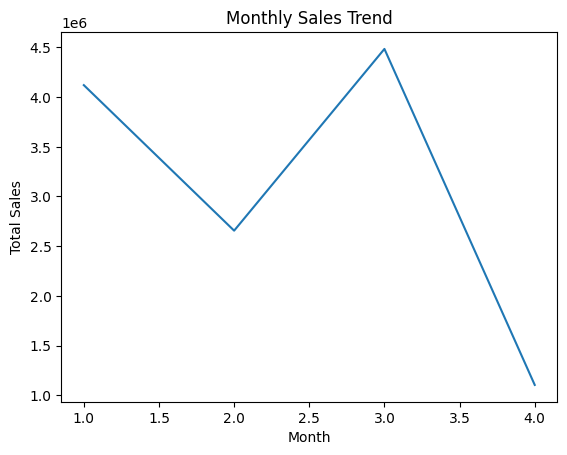

In [7]:
# Monthly sales trend
monthly_sales = sales.groupby(['Year','Month'])['TotalSales'].sum().reset_index()

# Best selling products
best_products = sales.groupby('Product')['TotalSales'].sum().sort_values(ascending=False)

display(best_products.head(10))

# Trend visualization
plt.figure()
plt.plot(monthly_sales['Month'], monthly_sales['TotalSales'])
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


Advanced Analysis

In [9]:
# Pivot Table: Region vs Product
pivot_table = pd.pivot_table(
    sales,
    values='TotalSales',
    index='Region',
    columns='Product',
    aggfunc='sum',
    fill_value=0
)

display(pivot_table)

# Retention rate
retention_rate = churn['Churn'].value_counts(normalize=True) * 100
display(retention_rate)

# Cross-selling (product combinations)
product_pairs = sales.groupby(['Customer_ID','Product']).size().unstack(fill_value=0)
display(product_pairs.head())

Product,Headphones,Laptop,Monitor,Phone,Tablet
Region,,,,,
East,288361,221946,642870,506828,859634
North,107091,1798206,397100,489284,1191954
South,512168,1373120,39924,1471428,341212
West,476413,495938,268177,391854,491540


,proportion
Churn,
0,89.4
1,10.6


Product,Headphones,Laptop,Monitor,Phone,Tablet
Customer_ID,,,,,
CUST001,0,0,0,1,0
CUST002,1,0,0,0,0
CUST003,0,0,0,1,0
CUST004,1,0,0,0,0
CUST005,0,1,0,0,0


Dashboard Creation (5 Visualizations)

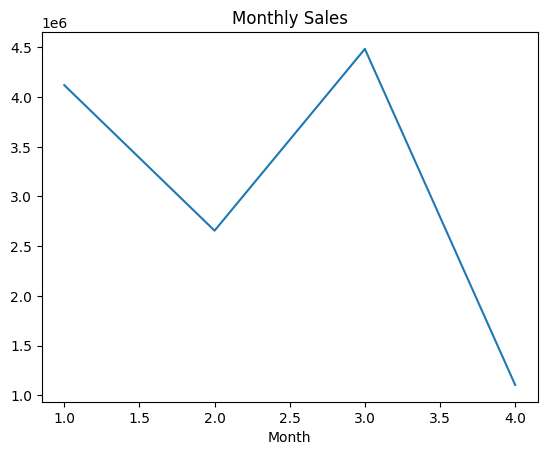

In [10]:
plt.figure()
monthly_sales.groupby('Month')['TotalSales'].sum().plot(kind='line')
plt.title("Monthly Sales")
plt.show()


Top Products


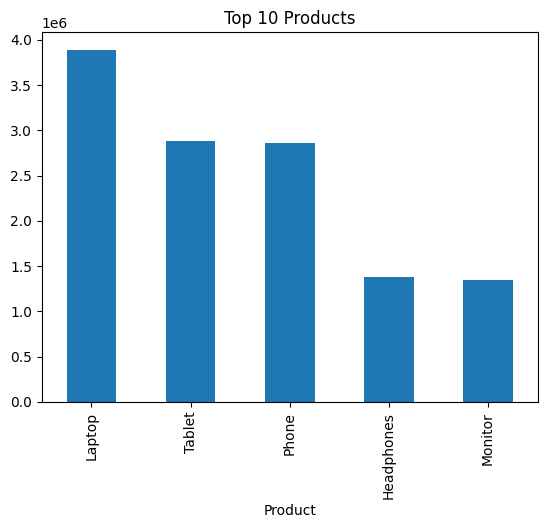

In [11]:
plt.figure()
best_products.head(10).plot(kind='bar')
plt.title("Top 10 Products")
plt.show()


Regional Sales

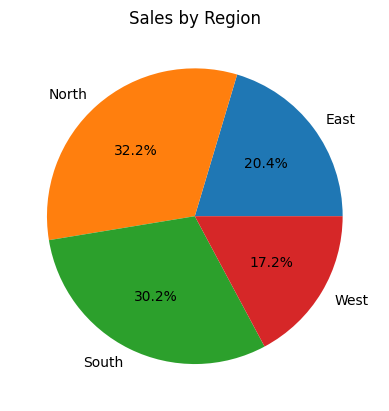

In [12]:
plt.figure()
sales.groupby('Region')['TotalSales'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title("Sales by Region")
plt.ylabel("")
plt.show()


Churn Distribution

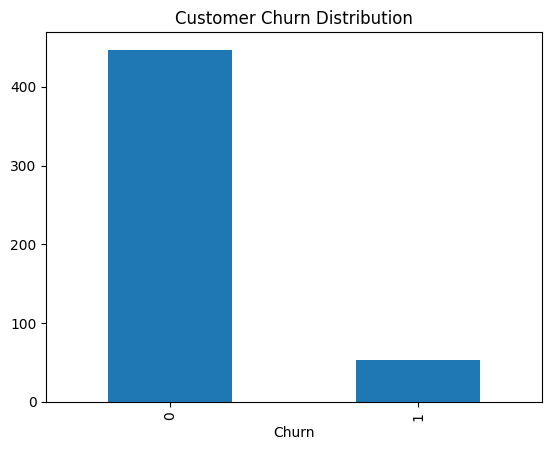

In [13]:
plt.figure()
churn['Churn'].value_counts().plot(kind='bar')
plt.title("Customer Churn Distribution")
plt.show()


CLV Distribution

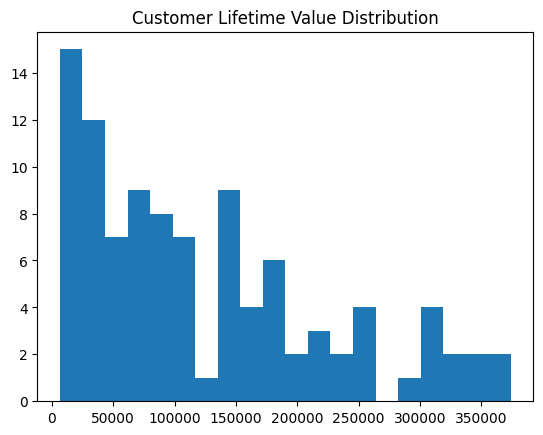

In [14]:
plt.figure()
plt.hist(clv['TotalRevenue'], bins=20)
plt.title("Customer Lifetime Value Distribution")
plt.show()


Report & Business Insights

In [18]:
import pandas as pd

sales = pd.read_csv("sales_data.csv")

# If not already created earlier
sales['TotalSales'] = sales['Quantity'] * sales['Price']

# Total Revenue
total_revenue = sales['TotalSales'].sum()

# Total Customers
total_customers = sales['Customer_ID'].nunique()

# Average Order Value
average_order_value = sales['TotalSales'].mean()

# Top Customer
top_customer_data = (
    sales.groupby('Customer_ID')['TotalSales']
    .sum()
    .reset_index()
    .sort_values(by='TotalSales', ascending=False)
    .iloc[0]
)

top_customer_name = top_customer_data['Customer_ID']
top_customer_sales = top_customer_data['TotalSales']

# ==============================
# REPORT OUTPUT
# ==============================

print("=" * 55)
print("        CUSTOMER SALES ANALYSIS REPORT")
print("=" * 55)

print(f"\nTotal Revenue        : ${total_revenue:,.0f}")
print(f"Total Customers      : {total_customers:,}")
print(f"Average Order Value  : ${average_order_value:,.0f}")
print(f"Top Customer         : {top_customer_name} - ${top_customer_sales:,.0f}")

print("\n--- KEY INSIGHTS ---")
print("• High-value customers contribute a major share of revenue.")
print("• Average order value indicates strong upselling potential.")
print("• Retention of top customers can significantly improve profits.")

print("\n--- BUSINESS RECOMMENDATIONS ---")
print("• Introduce loyalty programs for high-value customers.")
print("• Implement cross-selling strategies to increase order value.")
print("• Focus marketing efforts on high-performing regions.")

print("\nReport Generated Successfully")
print("=" * 55)

        CUSTOMER SALES ANALYSIS REPORT

Total Revenue        : $12,365,048
Total Customers      : 100
Average Order Value  : $123,650
Top Customer         : CUST016 - $373,932

--- KEY INSIGHTS ---
• High-value customers contribute a major share of revenue.
• Average order value indicates strong upselling potential.
• Retention of top customers can significantly improve profits.

--- BUSINESS RECOMMENDATIONS ---
• Introduce loyalty programs for high-value customers.
• Implement cross-selling strategies to increase order value.
• Focus marketing efforts on high-performing regions.

Report Generated Successfully
